In [1]:
# import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from venn import venn

In [ ]:
# First we check the structure and organisatio of each data
data_files = [file for file in os.listdir("./Fitabase_Data_4.12.16-5.12.16") if file.endswith(".csv")]
data_files.sort()
#print(data_files)
for f in data_files: 
    df = pd.read_csv(os.path.join("./Fitabase_Data_4.12.16-5.12.16",f)) 
    num_users = len(df["Id"].unique())
    print("*"*60)
    print(f"\n{f}\n{df.dtypes} \n")
    print(f"\n{f}\n{df.head()} \n")
    print(f"The shape of the data is {df.shape}")
    print(f"The nuber of users is {num_users}")
    print("*"*60 + "\n")

# flush out unwanted variables
del df, num_users

In [2]:
# We can see that the daily infomations are integrated in the file named dailyActivity_merged.csv
# Another thing we can conclude from the the code is that not all the user used all the service
# Based on the result we know there are 
# 33 users track their daily activity
# 24 users track their sleep
# 14 users track their H.R.
# 8 users track their weights

dailyActivity_merged_df = pd.read_csv(os.path.join("./Fitabase_Data_4.12.16-5.12.16", "dailyActivity_merged.csv")) 
sleepDay_merged_df = pd.read_csv(os.path.join("./Fitabase_Data_4.12.16-5.12.16", "sleepDay_merged.csv"))
heartrate_seconds_merged_df = pd.read_csv(os.path.join("./Fitabase_Data_4.12.16-5.12.16", "heartrate_seconds_merged.csv"))
weightLogInfo_merged_df = pd.read_csv(os.path.join("./Fitabase_Data_4.12.16-5.12.16", "weightLogInfo_merged.csv"))

activity_set = set(dailyActivity_merged_df["Id"])
sleepDay_set = set(sleepDay_merged_df["Id"])
heartrate_set = set(heartrate_seconds_merged_df["Id"])
weight_set = set(weightLogInfo_merged_df["Id"])

print("Activity_users: {}".format(len(activity_set)))
print("sleepDay_users: {}".format(len(sleepDay_set)))
print("heartrate_users: {}".format(len(heartrate_set)))
print("weight_users: {}".format(len(weight_set)))
id_set = {
    "activity_set": activity_set,
    "sleepDay_set": sleepDay_set,
    "heartrate_set" : heartrate_set,
    "weight_set": weight_set

}


Activity_users: 33
sleepDay_users: 24
heartrate_users: 14
weight_users: 8


<AxesSubplot:>

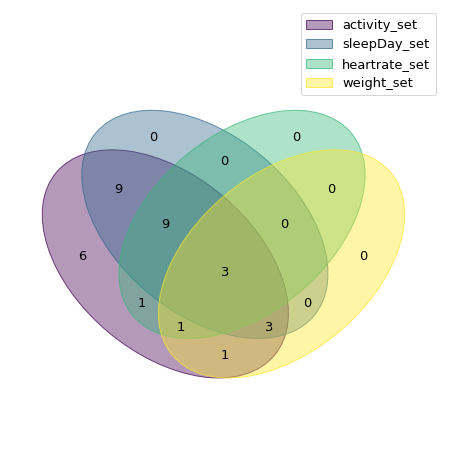

In [3]:
venn(id_set)

## From Venn diagram I know:

There are overall 33 users <br/>

Users who used dual function:<br/>
<ul>
<li>24 (72%) users track both activity and sleep<br/></li>
<li>14 (42%) users track both activity and H.R. <br/></li>
<li> 8 (24%) users track both activity and weight. <br/></li>
<li>12 (36%) users track both sleep and H.R. <br/></li>
<li> 6 (18%) users track both sleep and weight <br/></li>
<li> 4 (12%) users track their H.R. and weight <br/></li>
</ul>
Users who used tripple functions: <br/>
<ul>
<li>12 users track activity, sleep and H.R. <br/></li>
<li>6 users track activity, sleep and weghts. <br/></li>
</ul>

Finally, merely 3 users track activity, sleep, H.R. and weight

In [4]:
# Since there are 33 users who track daily activity 
# and 24 users track both daily activity and daily sleep 
# therefore, I merged these two data together
# Let's convert the daily activilty and sleep data into right format and merge them together
dailyActivity_merged_df["Date"] = pd.to_datetime(dailyActivity_merged_df["ActivityDate"])
sleepDay_merged_df["Date"] = pd.to_datetime(sleepDay_merged_df["SleepDay"])
daily_data = dailyActivity_merged_df.merge(right=sleepDay_merged_df, how="left", left_on=["Id", "Date"], right_on=["Id", "Date"])
daily_data["week_day"] = daily_data["Date"].dt.dayofweek

# Clean the data
daily_data = daily_data.drop(["ActivityDate", "SleepDay"], axis=1)
daily_data = daily_data.drop_duplicates()
print(daily_data.dtypes) 
print(daily_data.shape)


Id                                   int64
TotalSteps                           int64
TotalDistance                      float64
TrackerDistance                    float64
LoggedActivitiesDistance           float64
VeryActiveDistance                 float64
ModeratelyActiveDistance           float64
LightActiveDistance                float64
SedentaryActiveDistance            float64
VeryActiveMinutes                    int64
FairlyActiveMinutes                  int64
LightlyActiveMinutes                 int64
SedentaryMinutes                     int64
Calories                             int64
Date                        datetime64[ns]
TotalSleepRecords                  float64
TotalMinutesAsleep                 float64
TotalTimeInBed                     float64
week_day                             int64
dtype: object
(940, 19)


Text(0, 0.5, 'Days of uasage')

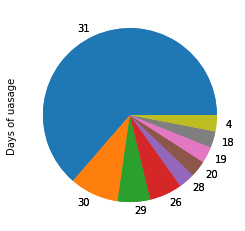

In [6]:
# So that bring us the key question, how do people use their smart devices?
# That's starts with the frequency, all the users track their daily activity, 
# but how long does they actually track
# from the figure we can see that 64 % of users track their activity everyday

temp_data = daily_data.groupby("Id")["TotalSteps"].count().value_counts()
temp_data.plot.pie()
daily_data.groupby("Id")["TotalSteps"].count().value_counts().plot.pie()
plt.ylabel("Days of uasage")

['TotalSteps' 'TotalDistance' 'TrackerDistance' 'LoggedActivitiesDistance'
 'VeryActiveDistance' 'ModeratelyActiveDistance' 'LightActiveDistance'
 'SedentaryActiveDistance' 'VeryActiveMinutes' 'FairlyActiveMinutes'
 'LightlyActiveMinutes' 'SedentaryMinutes' 'Calories' 'TotalMinutesAsleep'
 'TotalTimeInBed']


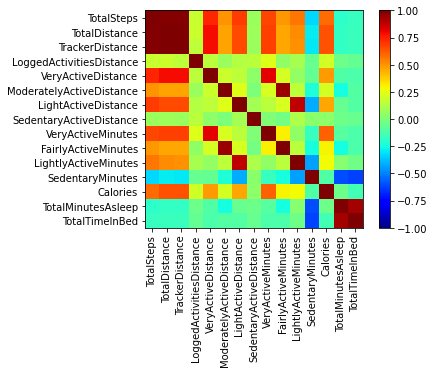

In [7]:
# Now, see the correlation between data
# remember to remove unnecessary data
temp_daily_data = daily_data.drop(["Date", "Id", "TotalSleepRecords", "week_day"], axis = 1)
corr_map = temp_daily_data.corr()
corr_labels = temp_daily_data.columns.to_list()
print(temp_daily_data.columns.values)
plt.imshow(corr_map, cmap = "jet", vmin = -1, vmax = 1)
plt.colorbar()
plt.xticks(ticks= range(len(corr_labels)),labels= corr_labels, rotation = 90)
plt.yticks(ticks= range(len(corr_labels)),labels= corr_labels)
plt.show()

array([[<AxesSubplot:xlabel='TotalSteps', ylabel='TotalSteps'>,
        <AxesSubplot:xlabel='VeryActiveMinutes', ylabel='TotalSteps'>,
        <AxesSubplot:xlabel='FairlyActiveMinutes', ylabel='TotalSteps'>,
        <AxesSubplot:xlabel='LightlyActiveMinutes', ylabel='TotalSteps'>,
        <AxesSubplot:xlabel='SedentaryMinutes', ylabel='TotalSteps'>,
        <AxesSubplot:xlabel='Calories', ylabel='TotalSteps'>,
        <AxesSubplot:xlabel='TotalMinutesAsleep', ylabel='TotalSteps'>],
       [<AxesSubplot:xlabel='TotalSteps', ylabel='VeryActiveMinutes'>,
        <AxesSubplot:xlabel='VeryActiveMinutes', ylabel='VeryActiveMinutes'>,
        <AxesSubplot:xlabel='FairlyActiveMinutes', ylabel='VeryActiveMinutes'>,
        <AxesSubplot:xlabel='LightlyActiveMinutes', ylabel='VeryActiveMinutes'>,
        <AxesSubplot:xlabel='SedentaryMinutes', ylabel='VeryActiveMinutes'>,
        <AxesSubplot:xlabel='Calories', ylabel='VeryActiveMinutes'>,
        <AxesSubplot:xlabel='TotalMinutesAsleep', ylabel=

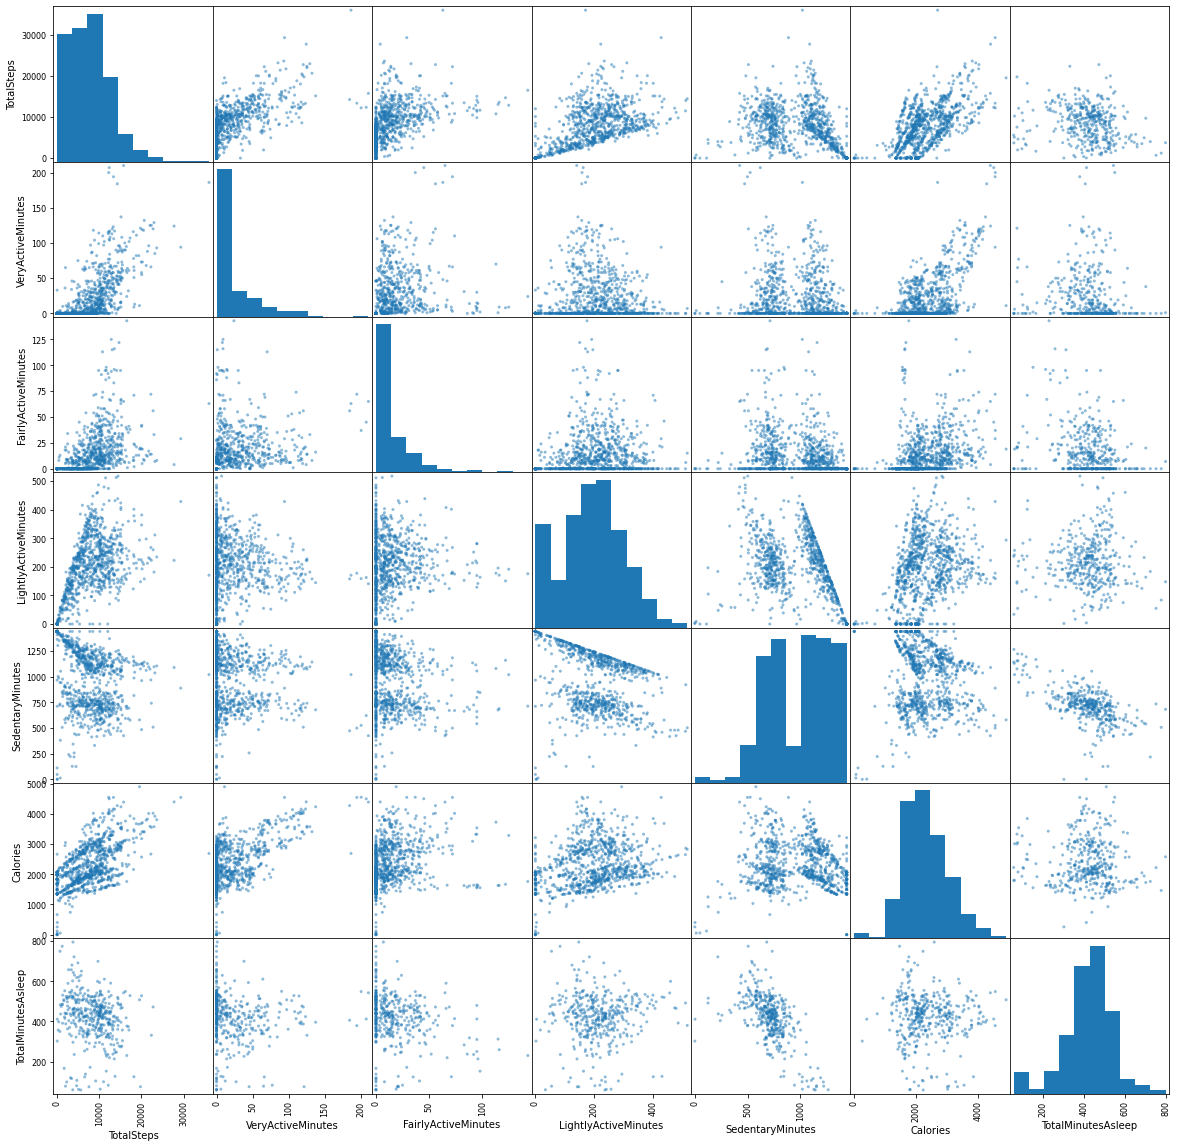

In [8]:
# The active minutes is highly correlate to the active distance, I simplified the scatter_matrix to
pd.plotting.scatter_matrix(temp_daily_data[["TotalSteps", 
                                            'VeryActiveMinutes', 
                                            'FairlyActiveMinutes', 
                                            'LightlyActiveMinutes', 
                                            'SedentaryMinutes', 
                                            "Calories", 
                                            "TotalMinutesAsleep"]], 
                                            figsize= (20,20))

## My observation
<ul>
<li>Appears some of the data distribution are skewed </br></li>

<li>It seems that there's a high positive correlation between TotalSteps and Calories
and negative correlation between SedentaryMinutes and calories </br> </li>
</ul>

## Questions:
<li> But does their sleep time impact their calories burned as well? </br> </li>

Text(0, 0.5, 'Calories consumed')

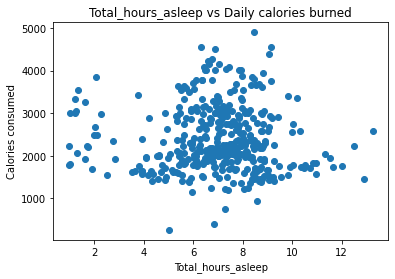

In [9]:
# But does their sleep time impact their calories burned as well?
# It seems no difference from scatter matrix, but if I take a close look
# I discovered that most data are locate between 6-8 hrs
plt.scatter(x = daily_data["TotalMinutesAsleep"]/60, y = daily_data["Calories"])
plt.title("Total_hours_asleep vs Daily calories burned")
plt.xlabel("Total_hours_asleep")
plt.ylabel("Calories consumed")

In [10]:
# So I categorised their sleep patterns based on the duration
# Based on the recommendation an adult should have sleep time between 6-8 hrs
daily_data.loc[pd.isna(daily_data["TotalMinutesAsleep"]/60) == True , "sleepPatterns"] = "No Records"
daily_data.loc[daily_data["TotalMinutesAsleep"]/60 < 6, "sleepPatterns"] = "< 6 hours"
daily_data.loc[(daily_data["TotalMinutesAsleep"]/60 >= 6) & (daily_data["TotalMinutesAsleep"]/60 <=8), "sleepPatterns"] = "6-8 hours"
daily_data.loc[daily_data["TotalMinutesAsleep"]/60 > 8 , "sleepPatterns"] = "> 8 hours"



Text(0, 0.5, 'mean_Calories_consumed')

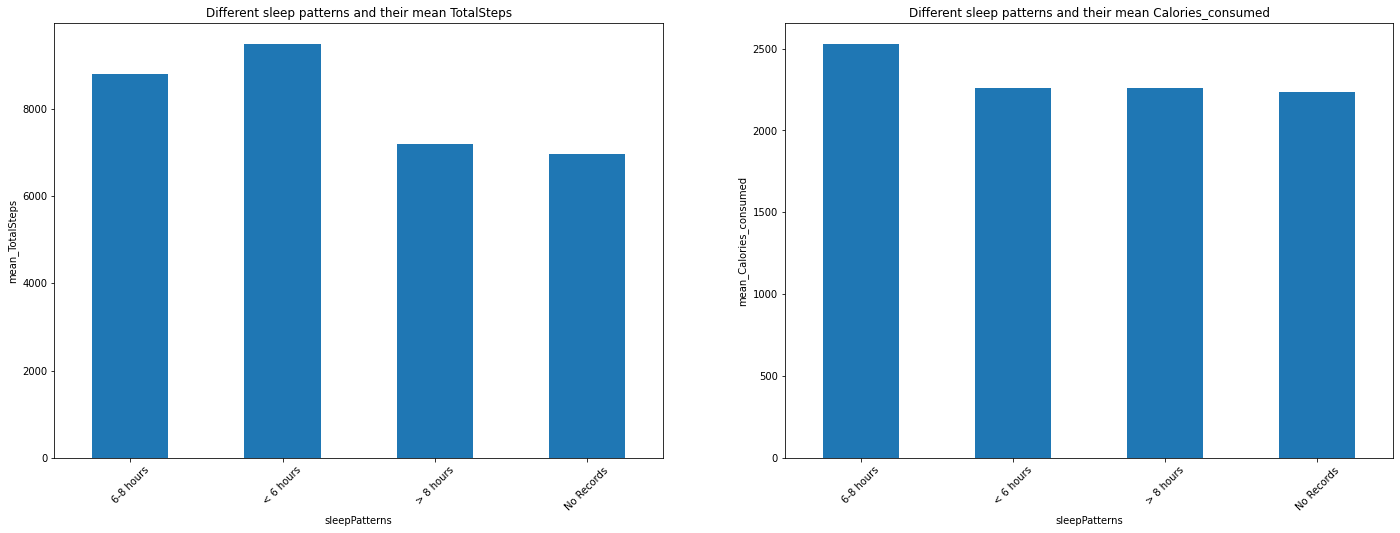

In [11]:
# So generally those who sleep 6-8 hrs burn more calories and have the second highest Total steps

plt.figure(figsize= (24, 8))
plt.subplot(1,2,1)
daily_data.groupby("sleepPatterns").mean()["TotalSteps"].plot.bar(rot = 45)
plt.title("Different sleep patterns and their mean TotalSteps")
plt.ylabel("mean_TotalSteps")

plt.subplot(1,2,2)
daily_data.groupby("sleepPatterns").mean()["Calories"].plot.bar(rot = 45)
plt.title("Different sleep patterns and their mean Calories_consumed")
plt.ylabel("mean_Calories_consumed")



Text(0, 0.5, 'mean_SedentaryMinutes')

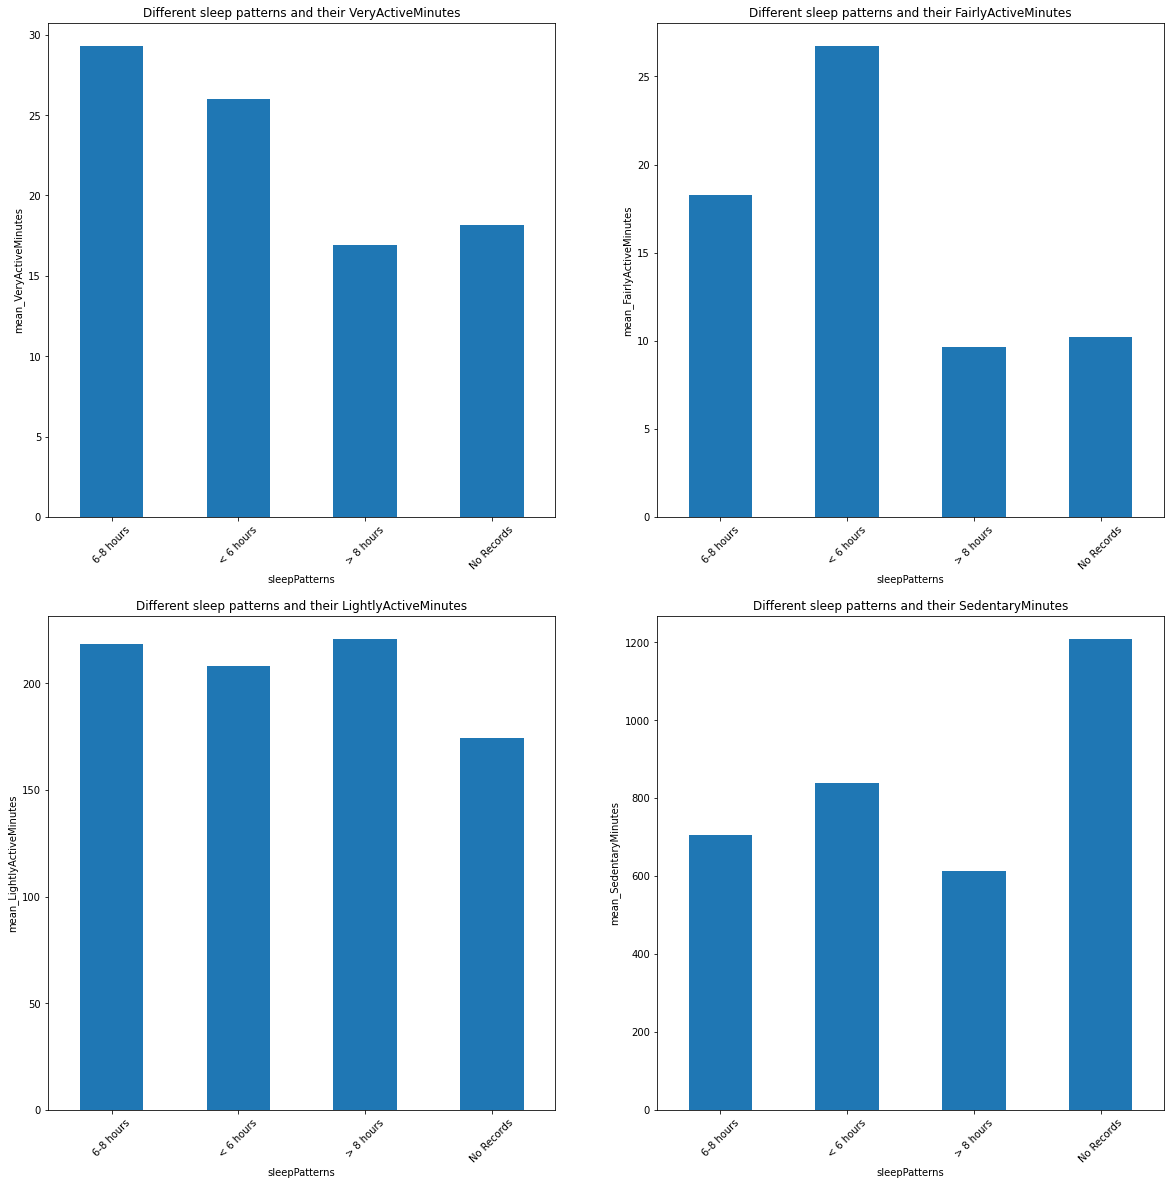

In [12]:
# But why? That's a tough question to answer
# To answer that question we can do further analysis
# We discover that that those who sleep normally (6-8 hrs)
# are generaly have higher veryActive minutes
# This discovey matches the correlation matrix
plt.figure(figsize=(20,20))

plt.subplot(2,2,1)
daily_data.groupby("sleepPatterns").mean()["VeryActiveMinutes"].plot.bar(rot = 45)
plt.title("Different sleep patterns and their VeryActiveMinutes")
plt.ylabel("mean_VeryActiveMinutes")

plt.subplot(2,2,2)
daily_data.groupby("sleepPatterns").mean()["FairlyActiveMinutes"].plot.bar(rot = 45)
plt.title("Different sleep patterns and their FairlyActiveMinutes")
plt.ylabel("mean_FairlyActiveMinutes")

plt.subplot(2,2,3)
daily_data.groupby("sleepPatterns").mean()["LightlyActiveMinutes"].plot.bar(rot = 45)
plt.title("Different sleep patterns and their LightlyActiveMinutes")
plt.ylabel("mean_LightlyActiveMinutes")

plt.subplot(2,2,4)
daily_data.groupby("sleepPatterns").mean()["SedentaryMinutes"].plot.bar(rot = 45)
plt.title("Different sleep patterns and their SedentaryMinutes")
plt.ylabel("mean_SedentaryMinutes")

In [ ]:
daily_data_mod = daily_data[daily_data["sleepPatterns"] != "No Records"]

for n, grp in  daily_data_mod.groupby("sleepPatterns"):
    plt.scatter(x = "VeryActiveMinutes", y = "Calories", data=grp, label=n, alpha= 0.5)
plt.legend(title="Label")

## More questions:
Do the activity patterns affect the sleep quality? 

Unfortunately, this dataset do not provide this information

This can be further analysed, maybe can ask for the stakeholders.

In [13]:
# Discover the trend in weghts, daily activity and sleep patterns
# The data are small, it's hard to obtain trend

weightLogInfo_merged_df["Date"] = pd.to_datetime(weightLogInfo_merged_df["Date"]).dt.date
weightLogInfo_merged_df["Date"] = pd.to_datetime(weightLogInfo_merged_df["Date"])
daily_data = daily_data.merge(right=weightLogInfo_merged_df, how="left", left_on=["Id", "Date"], right_on=["Id", "Date"])
daily_data

Id  TotalSteps  TotalDistance  TrackerDistance  \
0    1503960366       13162       8.500000         8.500000   
1    1503960366       10735       6.970000         6.970000   
2    1503960366       10460       6.740000         6.740000   
3    1503960366        9762       6.280000         6.280000   
4    1503960366       12669       8.160000         8.160000   
..          ...         ...            ...              ...   
935  8877689391       10686       8.110000         8.110000   
936  8877689391       20226      18.250000        18.250000   
937  8877689391       10733       8.150000         8.150000   
938  8877689391       21420      19.559999        19.559999   
939  8877689391        8064       6.120000         6.120000   

     LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                         0.0                1.88                      0.55   
1                         0.0                1.57                      0.69   
2                         0.0                2.44                      0.40   
3                         0.0                2.14                      1.26   
4                         0.0                2.71                      0.41   
..                        ...                 ...                       ...   
935                       0.0                1.08                      0.20   
936                       0.0               11.10                      0.80   
937                       0.0                1.35                      0.46   
938                       0.0               13.22                      0.41   
939                       0.0                1.82                      0.04   

     LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  ...  \
0                   6.06                     0.00                 25  ...   
1                   4.71                     0.00                 21  ...   
2                   3.91                     0.00                 30  ...   
3                   2.83                     0.00                 29  ...   
4                   5.04                     0.00                 36  ...   
..                   ...                      ...                ...  ...   
935                 6.80                     0.00                 17  ...   
936                 6.24                     0.05                 73  ...   
937                 6.28                     0.00                 18  ...   
938                 5.89                     0.00                 88  ...   
939                 4.25                     0.00                 23  ...   

     TotalMinutesAsleep  TotalTimeInBed  week_day  sleepPatterns   WeightKg  \
0                 327.0           346.0         1      < 6 hours        NaN   
1                 384.0           407.0         2      6-8 hours        NaN   
2                   NaN             NaN         3     No Records        NaN   
3                 412.0           442.0         4      6-8 hours        NaN   
4                 340.0           367.0         5      < 6 hours        NaN   
..                  ...             ...       ...            ...        ...   
935                 NaN             NaN         6     No Records  85.400002   
936                 NaN             NaN         0     No Records  85.500000   
937                 NaN             NaN         1     No Records        NaN   
938                 NaN             NaN         2     No Records  85.400002   
939                 NaN             NaN         3     No Records  84.000000   

     WeightPounds  Fat        BMI  IsManualReport         LogId  
0             NaN  NaN        NaN             NaN           NaN  
1             NaN  NaN        NaN             NaN           NaN  
2             NaN  NaN        NaN             NaN           NaN  
3             NaN  NaN        NaN             NaN           NaN  
4             NaN  NaN        NaN             NaN           NaN  
..            ...  ...        ...    

In [14]:
# Only 2 users track their activity more than 20 days
# It's hard to see the trend from the weight
data_with_weight = daily_data.loc[(daily_data["WeightKg"] > 0)]
data_with_weight.groupby("Id").count()

TotalSteps  TotalDistance  TrackerDistance  \
Id                                                       
1503960366           2              2                2   
1927972279           1              1                1   
2873212765           2              2                2   
4319703577           2              2                2   
4558609924           5              5                5   
5577150313           1              1                1   
6962181067          30             30               30   
8877689391          24             24               24   

            LoggedActivitiesDistance  VeryActiveDistance  \
Id                                                         
1503960366                         2                   2   
1927972279                         1                   1   
2873212765                         2                   2   
4319703577                         2                   2   
4558609924                         5                   5   
5577150313                         1                   1   
6962181067                        30                  30   
8877689391                        24                  24   

            ModeratelyActiveDistance  LightActiveDistance  \
Id                                                          
1503960366                         2                    2   
1927972279                         1                    1   
2873212765                         2                    2   
4319703577                         2                    2   
4558609924                         5                    5   
5577150313                         1                    1   
6962181067                        30                   30   
8877689391                        24                   24   

            SedentaryActiveDistance  VeryActiveMinutes  FairlyActiveMinutes  \
Id                                                                            
1503960366                        2                  2                    2   
1927972279                        1                  1                    1   
2873212765                        2                  2                    2   
4319703577                        2                  2                    2   
4558609924                        5                  5                    5   
5577150313                        1                  1                    1   
6962181067                       30                 30                   30   
8877689391                       24                 24                   24   

            ...  TotalMinutesAsleep  TotalTimeInBed  week_day  sleepPatterns  \
Id          ...                                                                
1503960366  ...                   2               2         2              2   
1927972279  ...                   1               1         1              1   
2873212765  ...                   0               0         2              2   
4319703577  ...                   0               0         2              2   
4558609924  ...                   1               1         5              5   
5577150313  ...                   1               1         1              1   
6962181067  ...                  30              30        30             30   
8877689391  ...                   0               0        24             24   

            WeightKg  WeightPounds  Fat  BMI  IsManualReport  LogId  
Id                                                                   
1503960366         2             2    1    2               2      2  
1927972279         1             1    0    1               1      1  
2873212765         2             2    0    2               2      2  
4319703577         2             2    1    2               2      2  
4558609924         5             5    0    5               5      5  
5577150313         1             1    0    1               1      1  
6962181067        30            30    0   30              30     30

## In this rough analysis, I discovered that:
<ol>
<li> Every user (N=33) have track have their daily activity for least 4 days </br>
30 users track their daily activity more than 20 days  </li>
</br>
<li> The 2 most used functions are activity tracker and sleep tracker </li>
</br>
<li> In general, those sleep between 6-8 hrs burn more calories and have higher very active minutes</br>
However, we cannot identify the relationship between their daily activity and sleep quality.</li>

</br>

<li> Users with higher daily activity burns more calories per day </li>

</ol>

## My opinions
<ol>  
  <li> Company can focus on the devices that with functions like tracking daily sleep and daily activity (Leaf and time), since most of the users enjoyed these 2 functions</li>
  
  </br>

  <li> Most of the users may not know how to use their devices or not interested in the functions the device provides. Only a small number of users (N=3) use all the 4 features the Fitbit provides. The company may need a tutorial for the usage of devices or encourage customers to use the services company provides.</li>

  </br>

  <li> It shows clear trend that the users with higher daily activity burns more calories per day, it can encourage users if they want to lose their weights</li>

</ol>